In [2]:
import os
from pathlib import Path
from tqdm.notebook import tqdm
from itertools import accumulate
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
okvqa = {}

okvqa['full'] = pd.read_json('data/OKVQA_object.json')
okvqa['conceptnet'] = pd.read_json('data/OKVQA_conceptnet.json')

In [9]:
okvqa['full'].head()

,image_id,question_id,answer_type,question_type,confidence,question_str,question_tokens,all_answers,answers,image_name,feature_path,annotator_agreement_cos,image_objects
0,51606,516065,other,four,3,What is the hairstyle of the blond called?,"[what, is, the, hairstyle, of, the, blond, cal...","[pony tail, pony tail, pony tail, pony tail, p...","[pony tail, pony tail, pony tail, pony tail, p...",COCO_train2014_000000051606,COCO_train2014_000000051606.npy,0.977160,"[person, person, tennis racket, chair]"
1,81721,817215,other,seven,5,How old do you have to be in canada to do this?,"[how, old, do, you, have, to, be, in, canada, ...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18]","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18]",COCO_train2014_000000081721,COCO_train2014_000000081721.npy,NaN,"[person, wine glass, person, wine glass, perso..."
2,480208,4802085,other,four,2,Can you guess the place where the man is playing?,"[can, you, guess, the, place, where, the, man,...","[aspen, aspen, mountain, mountain, mountain, m...","[aspen, aspen, mountain, mountain, mountain, m...",COCO_train2014_000000480208,COCO_train2014_000000480208.npy,0.974979,"[person, backpack, skis]"
3,570618,5706185,other,one,2,Which rail company is named after a town in ne...,"[which, rail, company, is, named, after, a, to...","[santa fe, santa fe, santa fe, santa fe, new e...","[santa fe, santa fe, santa fe, santa fe, new e...",COCO_train2014_000000570618,COCO_train2014_000000570618.npy,0.960305,[train]
4,478903,4789035,other,seven,2,Is the boy swimming or doing another water act...,"[is, the, boy, swimming, or, doing, another, w...","[another activity, another activity, another a...","[another activity, another activity, another a...",COCO_train2014_000000478903,COCO_train2014_000000478903.npy,0.955901,"[person, surfboard]"


In [32]:
answer_file = 'data/answer_vocab_v10_count10.txt'

with open(answer_file, 'r') as f:
    lines = f.read().splitlines()

answer_vocab = set(lines)

In [199]:
# size of suggeted answer vocab (by KRISP)
answer_vocab.__len__()

2253

In [39]:
all_answers = okvqa['full'].answers.apply(pd.Series).stack().reset_index(drop=True)
unique_answers = all_answers.unique()

In [40]:
# percentage of unique answers of OKVQA occurring in suggested answer vocab by KRISP
pd.Series(unique_answers).apply(lambda x: x in answer_vocab).sum() / unique_answers.__len__()

0.11156914893617022

In [101]:
dist = okvqa['full'].answers.apply(lambda x: np.mean([single_answer in answer_vocab for single_answer in x]))

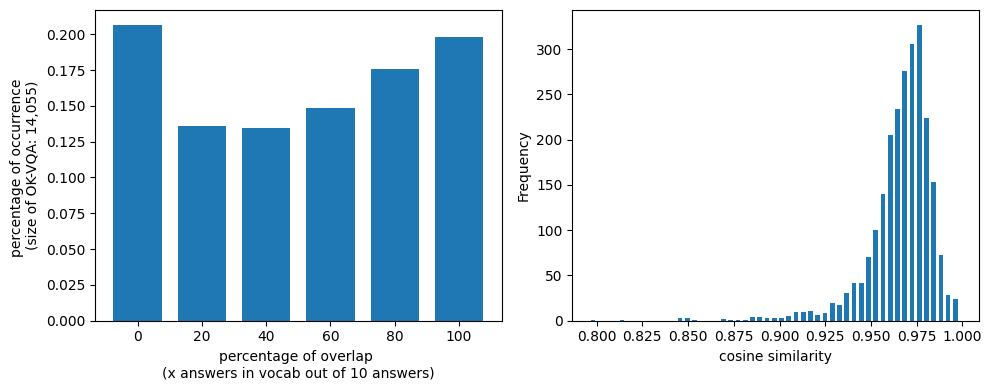

In [207]:
ticks, heights = list(zip(*sorted(Counter(dist).items(), key=lambda x: x[0])))

plt.figure(figsize=(10,4), dpi=100)
plt.subplot(121)
plt.bar(np.array(ticks)*100, heights / np.sum(heights), width=15)
plt.xlabel('percentage of overlap \n(x answers in vocab out of 10 answers)')
plt.ylabel('percentage of occurrence \n(size of OK-VQA: 14,055)')
#plt.title('A) Overlap between answer set and \nsuggested answer vocabulary', fontsize=15)

plt.subplot(122)
okvqa['full'][dist == 0].annotator_agreement_cos.plot(kind='hist', bins=51, width=0.0025)
plt.xlabel('cosine similarity')
#plt.title('B) Similarity of answers within the \n0-percent group on Figure A', fontsize=15)

plt.tight_layout()
plt.show()

In [152]:
okvqa['full']['answer_var'] = okvqa['full'].answers.apply(lambda x: np.unique(x).__len__())

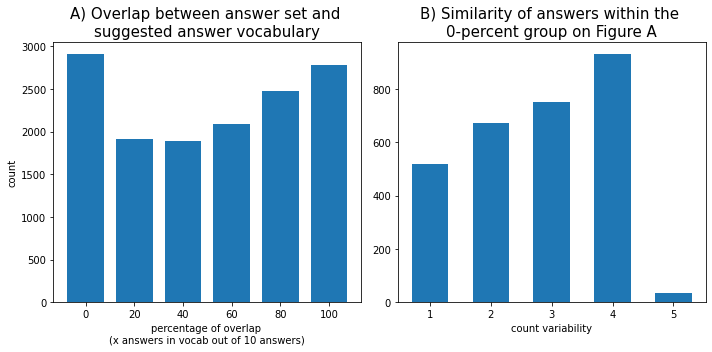

In [162]:
ticks, heights = list(zip(*sorted(Counter(dist).items(), key=lambda x: x[0])))

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.bar(np.array(ticks)*100, heights, width=15)
plt.xlabel('percentage of overlap \n(x answers in vocab out of 10 answers)')
plt.ylabel('count')
plt.title('A) Overlap between answer set and \nsuggested answer vocabulary', fontsize=15)

plt.subplot(122)
ticks, heights = list(zip(*sorted(Counter(okvqa['full'][dist == 0].answer_var).items(), key=lambda x: x[0])))
plt.bar(ticks, heights, width=0.6)
plt.xlabel('count variability')
plt.title('B) Similarity of answers within the \n0-percent group on Figure A', fontsize=15)

plt.tight_layout()
plt.show()

Extract

In [177]:
temp = []

for i, subframe in okvqa['full'].iterrows():
    
    question_tokens = set(subframe['question_tokens'])
    temp.append(np.mean([answer in question_tokens for answer in subframe['answers']]))

overlap_q_and_a = pd.Series(temp)

Number of I-Q pairs that have an overlap between given answers and question tokens: 935


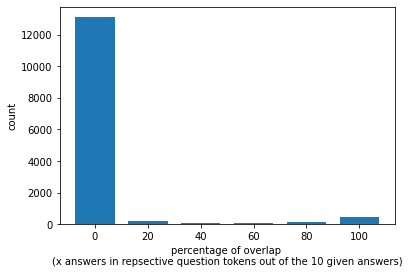

In [197]:
print(f"Number of I-Q pairs that have an overlap between given answers and question tokens: {(overlap_q_and_a != 0).sum()}")

ticks, heights = list(zip(*sorted(Counter(overlap_q_and_a).items(), key=lambda x: x[0])))

plt.bar(np.array(ticks)*100, heights, width=15)
plt.xlabel('percentage of overlap \n(x answers in repsective question tokens out of the 10 given answers)')
plt.ylabel('count')
plt.show()

In [21]:
okvqa = {}

okvqa['full'] = pd.read_json('data/OKVQA_object.json')
okvqa['conceptnet_q'] = pd.read_json('data/OKVQA_conceptnet.json')
okvqa['conceptnet_a'] = pd.read_json('data/okvqa_answers_conceptnet.json')

In [83]:
columns = list(okvqa['conceptnet_q'].columns[:-1])
percentage = []

for i, subframe in tqdm(okvqa['full'].iterrows(), total=okvqa['full'].__len__()):
    question_knowledge = pd.DataFrame()
    for token in subframe.question_tokens:
        temp = okvqa['conceptnet_q'][okvqa['conceptnet_q'].query_word == token]
        question_knowledge = pd.concat([question_knowledge, temp])
    
    answer_knowledge = pd.DataFrame()
    for token in np.unique((" ").join(subframe.answers).split(" ")) :
        temp = okvqa['conceptnet_a'][okvqa['conceptnet_a'].query_word == token]
        answer_knowledge = pd.concat([answer_knowledge, temp])
    
    question_nodes = pd.concat([question_knowledge.start_label, question_knowledge.end_label]).unique()
    answer_nodes = pd.concat([answer_knowledge.start_label, answer_knowledge.end_label]).unique()
    
    overlap = np.intersect1d(question_nodes, answer_nodes)
    
    if answer_nodes.__len__() != 0:
        percentage.append(overlap.__len__() / answer_nodes.__len__())     
    else:
        percentage.append(np.nan)

<AxesSubplot:ylabel='Frequency'>

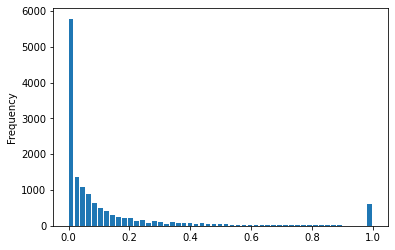

In [92]:
pd.Series(percentage).dropna().plot(kind='hist',bins=51, width=0.015)

In [99]:
pd.Series(percentage).dropna()

0        0.041667
1        0.000000
2        0.017241
3        0.200000
4        0.514706
           ...   
14050    0.000000
14051    0.125000
14052    0.100000
14053    0.137931
14054    0.000000
Length: 13950, dtype: float64